In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import geopandas as gpd
import seaborn as sns

#Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)

from scipy.stats import skew, kurtosis

import pygris
import shapely

In [ ]:
# rm(list=ls()) 

# library(devtools)


# library(choroplethrZip)
# library(tidyverse)

# https://github.com/arilamstein/choroplethrZip

In [88]:
df = pd.read_parquet("C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/FimaNfipClaims.parquet.gzip")

In [31]:
df.head()

,agricultureStructureIndicator,asOfDate,basementEnclosureCrawlspaceType,policyCount,crsClassificationCode,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,baseFloodElevation,ratedFloodZone,houseWorship,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDamageAmount,contentsDeductibleCode,netContentsPaymentAmount,contentsPropertyValue,disasterAssistanceCoverageRequired,eventDesignationNumber,ficoNumber,floodCharacteristicsIndicator,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityNumberCurrent,nfipCommunityName,nonPaymentReasonContents,nonPaymentReasonBuilding,numberOfUnits,buildingReplacementCost,contentsReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,floodZoneCurrent,buildingDescriptionCode,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id
0,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,1998-02-07T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,4.0,0,10.0,1.0,1963-01-01T00:00:00.000Z,1997-01-11T00:00:00.000Z,NaN,NaN,NaN,0,7,0,200000.0,50000.0,1998,0,382.0,0,0.00,937.0,1,N,NaN,0,0.0,NaN,0.0,None,612.0,NaN,0.0,0,Pineapple Express - Southern,15000.0,0.0,60294.0,None,"OCEANSIDE, CITY OF",97.0,1.0,1.0,937.0,NaN,A,0,0.0,None,NaN,0,CA,Currently Unavailable,92056.0,6073.0,6.073019e+09,6.073019e+10,33.2,-117.3,23dcb0d8-3e61-45bf-899f-b951946ce2ff
1,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,2005-08-29T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,2.0,0,NaN,1.0,1967-07-01T00:00:00.000Z,1990-07-12T00:00:00.000Z,NaN,NaN,NaN,0,7,0,100000.0,40000.0,2005,1,NaN,0,0.00,NaN,1,N,NaN,0,0.0,NaN,0.0,None,654.0,NaN,0.0,0,Hurricane Katrina,30000.0,0.0,225203.0,None,NEW ORLEANS/ORLEANS PARISH*,6.0,6.0,1.0,NaN,NaN,A,0,0.0,None,NaN,0,LA,Currently Unavailable,70131.0,22071.0,2.207100e+10,2.207100e+11,29.9,-90.0,55783cdd-ccbd-4b19-930b-072def248507
2,0,2020-01-22T16:55:53.194Z,NaN,1,9.0,1998-09-28T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,1.0,0,10.0,1.0,1972-01-01T00:00:00.000Z,1997-07-24T00:00:00.000Z,8813.21,1720.0,0.0,0,1,0,100000.0,50000.0,1998,1,9313.0,0,8813.21,80000.0,1,N,2220.0,0,1720.0,0.0,0.0,None,133.0,NaN,0.0,0,Hurricane Georges (Panhandle),15000.0,0.0,120274.0,None,SANTA ROSA COUNTY *,NaN,NaN,1.0,100000.0,0.0,A,0,0.0,None,NaN,0,FL,Currently Unavailable,32566.0,12113.0,1.211301e+10,1.211301e+11,30.4,-86.9,bfb5922b-1b21-4882-b1d4-b3825ff53e37
3,0,2019-09-19T13:45:58.425Z,1.0,1,9.0,1994-10-07T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,2.0,0,10.0,1.0,1960-01-01T00:00:00.000Z,1993-10-01T00:00:00.000Z,2906.00,0.0,0.0,0,7,0,100000.0,25000.0,1994,0,4428.0,0,2906.00,100000.0,1,N,NaN,0,0.0,NaN,0.0,None,NaN,NaN,0.0,0,None,NaN,0.0,450026.0,None,"BEAUFORT, CITY OF",97.0,NaN,1.0,0.0,NaN,A,0,0.0,None,NaN,0,SC,Currently Unavailable,29902.0,45013.0,4.501300e+10,4.501300e+11,32.4,-80.7,c1cf6e00-1e6d-4493-93fc-eb430ef15495
4,0,2019-09-19T13:45:58.425Z,NaN,1,8.0,1996-03-11T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,1.0,0,NaN,1.0,1988-01-01T00:00:00.000Z,1996-01-11T00:00:00.000Z,3875.53,1545.0,0.0,1,7,0,100000.0,25000.0,1996,1,5252.0,0,3875.53,100000.0,1,N,3115.0,0,1545.0,0.0,0.0,None,NaN,NaN,0.0,0,None,NaN,0.0,125092.0,None,BREVARD COUNTY *,NaN,NaN,1.0,0.0,0.0,A,0,0.0,None,1.0,0,FL,Currently Unavailable,32940.0,12009.0,1.200906e+10,1.200906e+11,28.3,-80.7,cad8334c-13f2-4837-bdcf-e09591197ff7


In [89]:
df_copy = df[['state', 'reportedZipCode', 'countyCode', 'censusTract', 'censusBlockGroupFips', 'latitude', 'longitude', 'yearOfLoss']].drop_duplicates()

In [47]:
df_copy[(df_copy['latitude'].isna()) & 
                   (df_copy['reportedZipCode'].notna())]['yearOfLoss'].unique()

array([1986, 1996, 1995, 2016, 1990, 1993, 2003, 1991, 1987, 1994, 2008,
       2015, 2017, 1992, 2004, 1989, 1985, 1997, 2002, 1998, 2005, 2009,
       2011, 2013, 2012, 2007, 2010, 2006, 1999, 2001, 1988, 2000, 1984,
       2014, 1981, 1982, 1983, 1978, 1980, 1979, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

In [39]:
df_test[df_test['nfipCommunityName'].isna()]['countyCode'].nunique()

999

In [30]:
df['reportedCity'].value_counts()

Currently Unavailable    2584242
Name: reportedCity, dtype: int64

In [34]:
df_test = df_copy.dropna(subset=['countyCode'])

In [35]:
df_test[df_test['nfipCommunityName'].notna()].head()

,state,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,yearOfLoss,nfipCommunityName
0,CA,92056.0,6073.0,6.073019e+09,6.073019e+10,33.2,-117.3,1998,"OCEANSIDE, CITY OF"
1,LA,70131.0,22071.0,2.207100e+10,2.207100e+11,29.9,-90.0,2005,NEW ORLEANS/ORLEANS PARISH*
2,FL,32566.0,12113.0,1.211301e+10,1.211301e+11,30.4,-86.9,1998,SANTA ROSA COUNTY *
3,SC,29902.0,45013.0,4.501300e+10,4.501300e+11,32.4,-80.7,1994,"BEAUFORT, CITY OF"
4,FL,32940.0,12009.0,1.200906e+10,1.200906e+11,28.3,-80.7,1996,BREVARD COUNTY *


In [3]:
df.head()

,agricultureStructureIndicator,asOfDate,basementEnclosureCrawlspaceType,policyCount,crsClassificationCode,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,baseFloodElevation,ratedFloodZone,houseWorship,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDamageAmount,contentsDeductibleCode,netContentsPaymentAmount,contentsPropertyValue,disasterAssistanceCoverageRequired,eventDesignationNumber,ficoNumber,floodCharacteristicsIndicator,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityNumberCurrent,nfipCommunityName,nonPaymentReasonContents,nonPaymentReasonBuilding,numberOfUnits,buildingReplacementCost,contentsReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,floodZoneCurrent,buildingDescriptionCode,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id
0,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,1998-02-07T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,4.0,0,10.0,1.0,1963-01-01T00:00:00.000Z,1997-01-11T00:00:00.000Z,NaN,NaN,NaN,0,7,0,200000.0,50000.0,1998,0,382.0,0,0.00,937.0,1,N,NaN,0,0.0,NaN,0.0,None,612.0,NaN,0.0,0,Pineapple Express - Southern,15000.0,0.0,60294.0,None,"OCEANSIDE, CITY OF",97.0,1.0,1.0,937.0,NaN,A,0,0.0,None,NaN,0,CA,Currently Unavailable,92056.0,6073.0,6.073019e+09,6.073019e+10,33.2,-117.3,23dcb0d8-3e61-45bf-899f-b951946ce2ff
1,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,2005-08-29T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,2.0,0,NaN,1.0,1967-07-01T00:00:00.000Z,1990-07-12T00:00:00.000Z,NaN,NaN,NaN,0,7,0,100000.0,40000.0,2005,1,NaN,0,0.00,NaN,1,N,NaN,0,0.0,NaN,0.0,None,654.0,NaN,0.0,0,Hurricane Katrina,30000.0,0.0,225203.0,None,NEW ORLEANS/ORLEANS PARISH*,6.0,6.0,1.0,NaN,NaN,A,0,0.0,None,NaN,0,LA,Currently Unavailable,70131.0,22071.0,2.207100e+10,2.207100e+11,29.9,-90.0,55783cdd-ccbd-4b19-930b-072def248507
2,0,2020-01-22T16:55:53.194Z,NaN,1,9.0,1998-09-28T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,1.0,0,10.0,1.0,1972-01-01T00:00:00.000Z,1997-07-24T00:00:00.000Z,8813.21,1720.0,0.0,0,1,0,100000.0,50000.0,1998,1,9313.0,0,8813.21,80000.0,1,N,2220.0,0,1720.0,0.0,0.0,None,133.0,NaN,0.0,0,Hurricane Georges (Panhandle),15000.0,0.0,120274.0,None,SANTA ROSA COUNTY *,NaN,NaN,1.0,100000.0,0.0,A,0,0.0,None,NaN,0,FL,Currently Unavailable,32566.0,12113.0,1.211301e+10,1.211301e+11,30.4,-86.9,bfb5922b-1b21-4882-b1d4-b3825ff53e37
3,0,2019-09-19T13:45:58.425Z,1.0,1,9.0,1994-10-07T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,2.0,0,10.0,1.0,1960-01-01T00:00:00.000Z,1993-10-01T00:00:00.000Z,2906.00,0.0,0.0,0,7,0,100000.0,25000.0,1994,0,4428.0,0,2906.00,100000.0,1,N,NaN,0,0.0,NaN,0.0,None,NaN,NaN,0.0,0,None,NaN,0.0,450026.0,None,"BEAUFORT, CITY OF",97.0,NaN,1.0,0.0,NaN,A,0,0.0,None,NaN,0,SC,Currently Unavailable,29902.0,45013.0,4.501300e+10,4.501300e+11,32.4,-80.7,c1cf6e00-1e6d-4493-93fc-eb430ef15495
4,0,2019-09-19T13:45:58.425Z,NaN,1,8.0,1996-03-11T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,1.0,0,NaN,1.0,1988-01-01T00:00:00.000Z,1996-01-11T00:00:00.000Z,3875.53,1545.0,0.0,1,7,0,100000.0,25000.0,1996,1,5252.0,0,3875.53,100000.0,1,N,3115.0,0,1545.0,0.0,0.0,None,NaN,NaN,0.0,0,None,NaN,0.0,125092.0,None,BREVARD COUNTY *,NaN,NaN,1.0,0.0,0.0,A,0,0.0,None,1.0,0,FL,Currently Unavailable,32940.0,12009.0,1.200906e+10,1.200906e+11,28.3,-80.7,cad8334c-13f2-4837-bdcf-e09591197ff7


In [8]:
sum(df[df['censusBlockGroupFips'].notna()]['latitude'].isna())

0

In [4]:
sum(df[df['latitude'].notna()]['censusBlockGroupFips'].isna())

97237

In [12]:
sum(df[df['latitude'].isna()]['reportedZipCode'].notna())

7193

In [5]:
sum(df[df['latitude'].notna()]['reportedZipCode'].isna())

23279

In [7]:
sum(df[(df['censusBlockGroupFips'].isna()) & (df['latitude'].notna())]['reportedZipCode'].notna())

95887

In [11]:
df_copy = df.copy()

In [11]:
df_copy = df.copy()
df_copy['censusBlockGroupFips'] = df_copy['censusBlockGroupFips'].fillna(0)
df_copy['censusBlockGroupFips'] = [str(int(float(i))) for i in df_copy['censusBlockGroupFips']]
df_copy['censusBlockGroupFips'] = [censusBG.zfill(12) for censusBG in df_copy['censusBlockGroupFips']]

In [12]:
df_copy['censusTract'] = df_copy['censusTract'].fillna(0)
df_copy['censusTract'] = [str(int(float(i))) for i in df_copy['censusTract']]
df_copy['censusTract'] = [censusBG.zfill(11) for censusBG in df_copy['censusTract']]

In [14]:
df_copy['countyCode'] = df_copy['countyCode'].fillna(0)
df_copy['countyCode'] = [str(int(float(i))) for i in df_copy['countyCode']]
df_copy['countyCode'] = [censusBG.zfill(5) for censusBG in df_copy['countyCode']]

In [15]:
df_copy.head()

,agricultureStructureIndicator,asOfDate,basementEnclosureCrawlspaceType,policyCount,crsClassificationCode,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,baseFloodElevation,ratedFloodZone,houseWorship,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDamageAmount,contentsDeductibleCode,netContentsPaymentAmount,contentsPropertyValue,disasterAssistanceCoverageRequired,eventDesignationNumber,ficoNumber,floodCharacteristicsIndicator,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityNumberCurrent,nfipCommunityName,nonPaymentReasonContents,nonPaymentReasonBuilding,numberOfUnits,buildingReplacementCost,contentsReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,floodZoneCurrent,buildingDescriptionCode,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id
0,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,1998-02-07T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,4.0,0,10.0,1.0,1963-01-01T00:00:00.000Z,1997-01-11T00:00:00.000Z,NaN,NaN,NaN,0,7,0,200000.0,50000.0,1998,0,382.0,0,0.00,937.0,1,N,NaN,0,0.0,NaN,0.0,None,612.0,NaN,0.0,0,Pineapple Express - Southern,15000.0,0.0,60294.0,None,"OCEANSIDE, CITY OF",97.0,1.0,1.0,937.0,NaN,A,0,0.0,None,NaN,0,CA,Currently Unavailable,92056.0,06073,06073018512,060730185123,33.2,-117.3,23dcb0d8-3e61-45bf-899f-b951946ce2ff
1,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,2005-08-29T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,2.0,0,NaN,1.0,1967-07-01T00:00:00.000Z,1990-07-12T00:00:00.000Z,NaN,NaN,NaN,0,7,0,100000.0,40000.0,2005,1,NaN,0,0.00,NaN,1,N,NaN,0,0.0,NaN,0.0,None,654.0,NaN,0.0,0,Hurricane Katrina,30000.0,0.0,225203.0,None,NEW ORLEANS/ORLEANS PARISH*,6.0,6.0,1.0,NaN,NaN,A,0,0.0,None,NaN,0,LA,Currently Unavailable,70131.0,22071,22071000616,220710006163,29.9,-90.0,55783cdd-ccbd-4b19-930b-072def248507
2,0,2020-01-22T16:55:53.194Z,NaN,1,9.0,1998-09-28T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,1.0,0,10.0,1.0,1972-01-01T00:00:00.000Z,1997-07-24T00:00:00.000Z,8813.21,1720.0,0.0,0,1,0,100000.0,50000.0,1998,1,9313.0,0,8813.21,80000.0,1,N,2220.0,0,1720.0,0.0,0.0,None,133.0,NaN,0.0,0,Hurricane Georges (Panhandle),15000.0,0.0,120274.0,None,SANTA ROSA COUNTY *,NaN,NaN,1.0,100000.0,0.0,A,0,0.0,None,NaN,0,FL,Currently Unavailable,32566.0,12113,12113010815,121130108152,30.4,-86.9,bfb5922b-1b21-4882-b1d4-b3825ff53e37
3,0,2019-09-19T13:45:58.425Z,1.0,1,9.0,1994-10-07T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,2.0,0,10.0,1.0,1960-01-01T00:00:00.000Z,1993-10-01T00:00:00.000Z,2906.00,0.0,0.0,0,7,0,100000.0,25000.0,1994,0,4428.0,0,2906.00,100000.0,1,N,NaN,0,0.0,NaN,0.0,None,NaN,NaN,0.0,0,None,NaN,0.0,450026.0,None,"BEAUFORT, CITY OF",97.0,NaN,1.0,0.0,NaN,A,0,0.0,None,NaN,0,SC,Currently Unavailable,29902.0,45013,45013000700,450130007002,32.4,-80.7,c1cf6e00-1e6d-4493-93fc-eb430ef15495
4,0,2019-09-19T13:45:58.425Z,NaN,1,8.0,1996-03-11T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,1.0,0,NaN,1.0,1988-01-01T00:00:00.000Z,1996-01-11T00:00:00.000Z,3875.53,1545.0,0.0,1,7,0,100000.0,25000.0,1996,1,5252.0,0,3875.53,100000.0,1,N,3115.0,0,1545.0,0.0,0.0,None,NaN,NaN,0.0,0,None,NaN,0.0,125092.0,None,BREVARD COUNTY *,NaN,NaN,1.0,0.0,0.0,A,0,0.0,None,1.0,0,FL,Currently Unavailable,32940.0,12009,12009063107,120090631073,28.3,-80.7,cad8334c-13f2-4837-bdcf-e09591197ff7


In [18]:
list_BG = ['420034961020', '360594169000', '390230000000', '120853819005', '482013428000']

In [124]:
list_Tract = ['12085381900', '39023000000']

In [125]:
test = df_copy[df_copy['censusTract'].isin(list_Tract)]

In [126]:
test

,agricultureStructureIndicator,asOfDate,basementEnclosureCrawlspaceType,policyCount,crsClassificationCode,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,baseFloodElevation,ratedFloodZone,houseWorship,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDamageAmount,contentsDeductibleCode,netContentsPaymentAmount,contentsPropertyValue,disasterAssistanceCoverageRequired,eventDesignationNumber,ficoNumber,floodCharacteristicsIndicator,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityNumberCurrent,nfipCommunityName,nonPaymentReasonContents,nonPaymentReasonBuilding,numberOfUnits,buildingReplacementCost,contentsReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,floodZoneCurrent,buildingDescriptionCode,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id
589026,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,2004-09-05T00:00:00.000Z,1,nan,1.0,7.0,AE,0,3.0,5.8,7.9,1.0,0,10.0,1.0,1988-06-06T00:00:00.000Z,2004-04-22T00:00:00.000Z,NaN,NaN,NaN,1,1,0,250000.0,100000.0,2004,1,NaN,0,0.00,NaN,None,N,NaN,0,0.0,NaN,0.0,None,641.0,NaN,0.0,0,Hurricane Frances,30000.0,0.0,120285.0,None,ST. LUCIE COUNTY *,6.0,6.0,1.0,NaN,NaN,None,0,0.0,None,1.0,0,FL,Currently Unavailable,34994.0,12085,12085381900,120853819005,27.2,-80.3,a8f6669c-9265-4977-a061-71661eea84fd
589027,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,2004-09-26T00:00:00.000Z,1,nan,1.0,7.0,AE,0,3.0,5.8,7.9,1.0,0,10.0,1.0,1988-06-06T00:00:00.000Z,2004-04-22T00:00:00.000Z,2880.00,0.0,0.0,1,1,0,250000.0,100000.0,2004,1,3380.0,0,2880.00,255400.0,1,N,NaN,0,0.0,NaN,0.0,None,646.0,NaN,0.0,0,Hurricane Jeanne,30000.0,0.0,120285.0,None,ST. LUCIE COUNTY *,20.0,NaN,1.0,319250.0,NaN,R,0,1.0,None,1.0,0,FL,Currently Unavailable,34994.0,12085,12085381900,120853819005,27.2,-80.3,58afac69-c56c-4542-bd1f-6ea3e1b3ba48
639311,0,2020-01-22T16:55:53.194Z,2.0,1,NaN,2014-05-21T00:00:00.000Z,0,nan,NaN,NaN,AE,0,NaN,NaN,NaN,2.0,0,NaN,1.0,1954-01-01T00:00:00.000Z,2013-04-23T00:00:00.000Z,NaN,NaN,NaN,0,1,0,162000.0,0.0,2014,0,1935.0,5,0.00,124259.0,4,N,NaN,0,0.0,NaN,0.0,None,NaN,NaN,0.0,0,None,30000.0,0.0,390732.0,None,CLARK COUNTY*,NaN,1.0,1.0,191168.0,NaN,R,0,6.0,None,1.0,0,OH,Currently Unavailable,45324.0,39023,39023000000,390230000000,39.9,-84.0,ef7315f4-61fc-43fd-b45c-e7a58f50e78a
1165874,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,2004-09-25T00:00:00.000Z,1,nan,2.0,100.0,AE,0,4.0,NaN,102.0,2.0,0,10.0,1.0,1981-06-16T00:00:00.000Z,2002-10-26T00:00:00.000Z,4356.41,0.0,0.0,0,1,0,250000.0,100000.0,2004,1,4857.0,0,4356.41,461199.0,1,N,NaN,0,0.0,NaN,0.0,None,646.0,NaN,0.0,0,Hurricane Jeanne,30000.0,0.0,120285.0,None,ST. LUCIE COUNTY *,20.0,NaN,1.0,524090.0,NaN,R,0,3.0,None,1.0,0,FL,Currently Unavailable,34994.0,12085,12085381900,120853819005,27.2,-80.3,e433289f-cdad-44f6-8664-7c760ede986f
1188485,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,2004-09-26T00:00:00.000Z,0,nan,2.0,7.0,AE,0,4.0,8.7,9.3,2.0,0,NaN,1.0,2001-02-01T00:00:00.000Z,2001-03-14T00:00:00.000Z,10362.40,0.0,0.0,1,1,0,250000.0,100000.0,2004,1,10862.0,0,10362.40,250000.0,0,N,NaN,0,0.0,NaN,0.0,None,646.0,NaN,0.0,0,Hurricane Jeanne,30000.0,0.0,120285.0,None,ST. LUCIE COUNTY *,97.0,NaN,1.0,250000.0,NaN,A,0,0.0,None,1.0,0,FL,Currently Unavailable,34994.0,12085,12085381900,120853819005,27.2,-80.3,d775860b-6277-46e0-9c67-6ff30a6b6e81


In [3]:
df.head()

,agricultureStructureIndicator,asOfDate,basementEnclosureCrawlspaceType,policyCount,crsClassificationCode,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,baseFloodElevation,ratedFloodZone,houseWorship,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDamageAmount,contentsDeductibleCode,netContentsPaymentAmount,contentsPropertyValue,disasterAssistanceCoverageRequired,eventDesignationNumber,ficoNumber,floodCharacteristicsIndicator,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityNumberCurrent,nfipCommunityName,nonPaymentReasonContents,nonPaymentReasonBuilding,numberOfUnits,buildingReplacementCost,contentsReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,floodZoneCurrent,buildingDescriptionCode,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id
0,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,1998-02-07T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,4.0,0,10.0,1.0,1963-01-01T00:00:00.000Z,1997-01-11T00:00:00.000Z,NaN,NaN,NaN,0,7,0,200000.0,50000.0,1998,0,382.0,0,0.00,937.0,1,N,NaN,0,0.0,NaN,0.0,None,612.0,NaN,0.0,0,Pineapple Express - Southern,15000.0,0.0,60294.0,None,"OCEANSIDE, CITY OF",97.0,1.0,1.0,937.0,NaN,A,0,0.0,None,NaN,0,CA,Currently Unavailable,92056.0,6073.0,6.073019e+09,6.073019e+10,33.2,-117.3,23dcb0d8-3e61-45bf-899f-b951946ce2ff
1,0,2020-01-22T16:55:53.194Z,NaN,1,8.0,2005-08-29T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,2.0,0,NaN,1.0,1967-07-01T00:00:00.000Z,1990-07-12T00:00:00.000Z,NaN,NaN,NaN,0,7,0,100000.0,40000.0,2005,1,NaN,0,0.00,NaN,1,N,NaN,0,0.0,NaN,0.0,None,654.0,NaN,0.0,0,Hurricane Katrina,30000.0,0.0,225203.0,None,NEW ORLEANS/ORLEANS PARISH*,6.0,6.0,1.0,NaN,NaN,A,0,0.0,None,NaN,0,LA,Currently Unavailable,70131.0,22071.0,2.207100e+10,2.207100e+11,29.9,-90.0,55783cdd-ccbd-4b19-930b-072def248507
2,0,2020-01-22T16:55:53.194Z,NaN,1,9.0,1998-09-28T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,1.0,0,10.0,1.0,1972-01-01T00:00:00.000Z,1997-07-24T00:00:00.000Z,8813.21,1720.0,0.0,0,1,0,100000.0,50000.0,1998,1,9313.0,0,8813.21,80000.0,1,N,2220.0,0,1720.0,0.0,0.0,None,133.0,NaN,0.0,0,Hurricane Georges (Panhandle),15000.0,0.0,120274.0,None,SANTA ROSA COUNTY *,NaN,NaN,1.0,100000.0,0.0,A,0,0.0,None,NaN,0,FL,Currently Unavailable,32566.0,12113.0,1.211301e+10,1.211301e+11,30.4,-86.9,bfb5922b-1b21-4882-b1d4-b3825ff53e37
3,0,2019-09-19T13:45:58.425Z,1.0,1,9.0,1994-10-07T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,2.0,0,10.0,1.0,1960-01-01T00:00:00.000Z,1993-10-01T00:00:00.000Z,2906.00,0.0,0.0,0,7,0,100000.0,25000.0,1994,0,4428.0,0,2906.00,100000.0,1,N,NaN,0,0.0,NaN,0.0,None,NaN,NaN,0.0,0,None,NaN,0.0,450026.0,None,"BEAUFORT, CITY OF",97.0,NaN,1.0,0.0,NaN,A,0,0.0,None,NaN,0,SC,Currently Unavailable,29902.0,45013.0,4.501300e+10,4.501300e+11,32.4,-80.7,c1cf6e00-1e6d-4493-93fc-eb430ef15495
4,0,2019-09-19T13:45:58.425Z,NaN,1,8.0,1996-03-11T00:00:00.000Z,0,nan,NaN,NaN,X,0,NaN,NaN,NaN,1.0,0,NaN,1.0,1988-01-01T00:00:00.000Z,1996-01-11T00:00:00.000Z,3875.53,1545.0,0.0,1,7,0,100000.0,25000.0,1996,1,5252.0,0,3875.53,100000.0,1,N,3115.0,0,1545.0,0.0,0.0,None,NaN,NaN,0.0,0,None,NaN,0.0,125092.0,None,BREVARD COUNTY *,NaN,NaN,1.0,0.0,0.0,A,0,0.0,None,1.0,0,FL,Currently Unavailable,32940.0,12009.0,1.200906e+10,1.200906e+11,28.3,-80.7,cad8334c-13f2-4837-bdcf-e09591197ff7


In [43]:
df.shape[0]

2584242

In [4]:
df['reportedZipCode'].dtypes

dtype('float64')

In [21]:
(df['state'].isna().sum() / df.shape[0])*100

0.0

In [3]:
(df['reportedZipCode'].isna().sum() / df.shape[0])*100

2.1602852983582808

In [20]:
df['reportedZipCode'].isna().sum()

55827

In [4]:
(df['censusBlockGroupFips'].isna().sum() / df.shape[0])*100

5.300509781978622

In [27]:
df['censusBlockGroupFips'].value_counts()

1.003011e+10    5119
4.816773e+11    3884
3.705597e+11    3816
1.097007e+10    3749
4.816772e+11    3268
                ... 
2.714103e+11       1
5.033020e+10       1
6.073019e+10       1
6.001410e+10       1
4.811302e+11       1
Name: censusBlockGroupFips, Length: 106786, dtype: int64

In [22]:
df['censusBlockGroupFips'].isna().sum()

136978

In [7]:
(df['countyCode'].isna().sum() / df.shape[0])*100

2.5122260221759416

In [28]:
df['countyCode'].value_counts()

48201.0    168854
22051.0    134210
22071.0    126774
12086.0     60739
48167.0     59777
            ...  
48169.0         1
16085.0         1
48105.0         1
1111.0          1
48305.0         1
Name: countyCode, Length: 2924, dtype: int64

In [23]:
df['countyCode'].isna().sum()

64922

In [8]:
(df['censusTract'].isna().sum() / df.shape[0])*100

5.300509781978622

In [29]:
df['censusTract'].value_counts()

3.705597e+10    7303
4.816773e+10    6855
1.203300e+10    6438
3.402974e+10    5642
1.003011e+09    5520
                ... 
4.019004e+09       1
4.019002e+09       1
6.111003e+09       1
6.089013e+09       1
4.811302e+10       1
Name: censusTract, Length: 53268, dtype: int64

In [25]:
df['censusTract'].isna().sum()

136978

In [5]:
(df['latitude'].isna().sum() / df.shape[0])*100

1.53782037440766

In [6]:
(df['longitude'].isna().sum() / df.shape[0])*100

1.53782037440766

In [44]:
len(list(df[['latitude', 'longitude']].drop_duplicates().itertuples(index=False, name=None)))

25128

In [24]:
df['latitude'].isna().sum()

39741

In [42]:
df[['reportedZipCode','censusBlockGroupFips','latitude', 'longitude']].drop_duplicates().shape[0]

177895

In [39]:
missing_all_three = df['censusBlockGroupFips'].isna() | df['latitude'].isna()

# To get the number of such rows
num_missing_all_three = missing_all_three.sum()

# To get the proportion of such rows
proportion_missing_all_three = num_missing_all_three / df.shape[0]

In [36]:
missing_all_three = df['reportedZipCode'].isna() | df['censusBlockGroupFips'].isna() | df['latitude'].isna()

# To get the number of such rows
num_missing_all_three = missing_all_three.sum()

# To get the proportion of such rows
proportion_missing_all_three = num_missing_all_three / df.shape[0]

In [35]:
proportion_missing_all_three*100

5.300509781978622

In [40]:
num_missing_all_three

136978

In [37]:
proportion_missing_all_three*100

6.149075821846406

In [38]:
num_missing_all_three

158907

In [11]:
#Zipcode list

list_zipcode = df['reportedZipCode'].dropna().drop_duplicates().astype(int).astype(str).tolist()

# add preceding 0 to make 4-digit zip codes into 5-digit
list_zipcode = [zipcode.zfill(5) for zipcode in list_zipcode]

# temp = pd.DataFrame(list_censusBG, columns=['ZipCode'])

# temp.to_csv('C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/ZipCode.csv', index=False)

In [12]:
#CensusBG list

list_censusBG = df['censusBlockGroupFips'].dropna().drop_duplicates().tolist()

list_censusBG = [str(int(float(i))) for i in list_censusBG]

# add preceding 0 to make 4-digit zip codes into 5-digit
list_censusBG = [censusBG.zfill(12) for censusBG in list_censusBG]

# temp = pd.DataFrame(list_censusBG, columns=['censusBG'])

# temp.to_csv('C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/censusBG.csv', index=False)

In [13]:
#lat long df

df_lat_long = df[['latitude', 'longitude']].dropna().drop_duplicates()

## Using pygris

In [ ]:
years = [2000, 2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [ ]:
# zip_codes_list = pygris.zctas(year=2000)

In [ ]:
# zip_codes_list.head()

In [ ]:
# zip_codes_list.shape[0]

In [3]:
# years = [2000, 2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

years = [2010, 2012, 2020, 2021]

yearly_data = {}

for i in years:
    yearly_data[i] = pygris.zctas(year=i)

In [ ]:
# temp = pygris.zctas(year=2000)

In [4]:
temp0 = pd.DataFrame(yearly_data[2010])

In [12]:
#Checking if all states found in our dataset are in the US Census Bureau TIGER/Line and cartographic boundary shapefiles

unique_states = temp0['ZCTA5CE10'].unique()
state_STUSPS_unique = temp1['ZCTA5CE10'].unique()

np.all(np.isin(unique_states, state_STUSPS_unique))

True

In [5]:
temp1 = pd.DataFrame(yearly_data[2012])

In [6]:
temp2 = pd.DataFrame(yearly_data[2020])

In [7]:
temp = pd.DataFrame(yearly_data[2021])

In [9]:
print(temp0.shape[0])
print(temp1.shape[0])
print(temp2.shape[0])
print(temp.shape[0])


print(temp0.head())
print(temp1.head())
print(temp2.head())
print(temp.head())

33120
33144
33791
33791
  ZCTA5CE10 GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  AWATER10  \
0     04757   04757        B5   G6350          S  334700805   3663844   
1     04758   04758        B5   G6350          S   91006829    191946   
2     04760   04760        B5   G6350          S  259787771    547534   
3     04975   04975        B5   G6350          S     142318         0   
4     04976   04976        B5   G6350          S  257908035   4722278   

    INTPTLAT10    INTPTLON10  \
0  +46.6676144  -068.1686355   
1  +46.5592719  -067.8532254   
2  +46.3393412  -067.9548745   
3  +44.6253540  -069.5883338   
4  +44.7892800  -069.6676898   

                                            geometry  
0  POLYGON ((-68.08095 46.56746, -68.08236 46.567...  
1  POLYGON ((-67.90650 46.52526, -67.90677 46.533...  
2  POLYGON ((-67.85272 46.37207, -67.84753 46.372...  
3  POLYGON ((-69.58945 44.62188, -69.58938 44.622...  
4  POLYGON ((-69.73503 44.78785, -69.73388 44.787...  
  ZCTA5CE10 GE

In [ ]:
temp.head()

In [ ]:
temp = temp[['ZCTA5CE20', 'geometry']]

In [ ]:
temp = temp.rename(columns={"ZCTA5CE20": "ZIPcode"})
temp['year'] = 2021
temp

In [ ]:
list_zipcode_temp = temp['ZIPcode'].dropna().drop_duplicates().astype(str).tolist()

# add preceding 0 to make 4-digit zip codes into 5-digit
list_zipcode_temp = [zipcode.zfill(5) for zipcode in list_zipcode_temp]

In [ ]:
len(list_zipcode_temp)

In [ ]:
list_zipcode_3 = list_zipcode_3 + list_zipcode_temp

In [ ]:
len(list_zipcode_3)

In [ ]:
list_zipcode_3 = list(set(list_zipcode_3))

In [ ]:
len(list_zipcode_3)

In [ ]:
set_zipcode = set(list_zipcode)
set_zipcode_3 = set(list_zipcode_3)

# Find the intersection of the two sets
common_zipcodes = set_zipcode.intersection(set_zipcode_3)

# Print the number of common zip codes
print("Number of common zip codes:", len(common_zipcodes))

In [ ]:
len(common_zipcodes)/len(list_zipcode)

In [ ]:
zip_code_df2000 = temp[temp['ZIPcode'].isin(common_zipcodes)]

In [ ]:
zip_code_df2000.head()

In [ ]:
zip_code_df2010 = temp[temp['ZIPcode'].isin(common_zipcodes)]

In [ ]:
zip_code_df2010.head()

In [ ]:
zip_code_df2012 = temp[temp['ZIPcode'].isin(common_zipcodes)]

In [ ]:
zip_code_df2012.head()

In [ ]:
zip_code_df2020 = temp[temp['ZIPcode'].isin(common_zipcodes)]

In [ ]:
zip_code_df2020.head()

In [ ]:
zip_code_df2021 = temp[temp['ZIPcode'].isin(common_zipcodes)]

In [ ]:
zip_code_df2021.head()

In [ ]:
zip_code_df = pd.concat([zip_code_df2000, zip_code_df2010, zip_code_df2012, zip_code_df2020, zip_code_df2021], ignore_index=True)

In [ ]:
zip_code_df = zip_code_df.drop_duplicates(subset=['ZIPcode', 'geometry'])

In [ ]:
zip_code_df.shape[0]

In [ ]:
zip_code_df.head()

In [ ]:
# Convert the geometry column to WKT format
zip_code_df['geometry'] = zip_code_df['geometry'].apply(lambda geom: geom.wkt)

In [ ]:
chunk_size = 25000  # adjust based on your system's capabilities
chunks = [x for x in range(0, len(zip_code_df), chunk_size)]

for start in chunks:
    end = start + chunk_size
    temp_df = zip_code_df.iloc[start:end].copy()
    temp_df['geometry'] = temp_df['geometry'].apply(lambda geom: geom.wkt)
    temp_df.to_parquet(f"C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/zipcode_geometry_{start}_{end}.parquet.gzip", compression='gzip')

In [2]:
# Read the parquet file
df_read = pd.read_parquet("C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/zipcode_geometry_0_25000.parquet.gzip")

# Convert the WKT strings back to geometries
gdf_read = gpd.GeoDataFrame(df_read, geometry=df_read['geometry'].apply(lambda x: shapely.wkt.loads(x)))

In [3]:
df_read.head()

,ZIPcode,geometry,year
0,38739,"MULTIPOLYGON (((-90.499253 34.053217, -90.4997...",2000
1,38767,"POLYGON ((-90.76477 34.119506, -90.766978 34.1...",2000
2,38669,"POLYGON ((-90.74080599999999 34.184565, -90.74...",2000
3,38630,"MULTIPOLYGON (((-90.67204699999999 34.259564, ...",2000
4,38639,"POLYGON ((-90.456458 34.31975, -90.456758 34.3...",2000


In [5]:
# import geopandas as gpd
# from shapely.wkt import loads

# # Assuming you have a DataFrame df with columns 'unit' and 'geometry'
# # Example:
# #    unit  |  geometry
# #   -------|-----------
# #    unit1 |  geom1
# #    unit2 |  geom2
# #    unit3 |  geom3

# # Here's a hypothetical dataset for demonstration
# data = {
#     'unit': ['unit1', 'unit2', 'unit3'],
#     'geometry': ['POLYGON ((0 0, 0 2, 2 2, 2 0, 0 0))',
#                 'POLYGON ((1 1, 1 3, 3 3, 3 1, 1 1))',
#                 'POLYGON ((0.5 0.5, 0.5 2.5, 2.5 2.5, 2.5 0.5, 0.5 0.5))']
# }

# # Convert string representations of geometries to actual Shapely geometry objects
# data['geometry'] = [loads(geom) for geom in data['geometry']]

# df = gpd.GeoDataFrame(data, geometry='geometry')

# # Get the intersection of the three geometries
# intersection_geom = df['geometry'].iloc[0]
# for geom in df['geometry'].iloc[1:]:
#     intersection_geom = intersection_geom.intersection(geom)

# print(intersection_geom)

POLYGON ((2 1, 1 1, 1 2, 2 2, 2 1))


In [ ]:
# Drop duplicates
zip_code_df = zip_code_df.drop_duplicates(subset=['ZIPcode'])

In [ ]:
list_zipcode_2 = zip_codes_list['ZCTA5CE20'].dropna().drop_duplicates().astype(str).tolist()

# add preceding 0 to make 4-digit zip codes into 5-digit
list_zipcode_2 = [zipcode.zfill(5) for zipcode in list_zipcode_2]

In [ ]:
# Convert both lists to sets
set_zipcode = set(list_zipcode)
set_zipcode_2 = set(list_zipcode_2)

# Find the intersection of the two sets
common_zipcodes = set_zipcode.intersection(set_zipcode_2)

# Print the number of common zip codes
print("Number of common zip codes:", len(common_zipcodes))

In [ ]:
len(common_zipcodes)/len(list_zipcode)

In [3]:
states = pygris.states()
states_list = sorted(states['STUSPS'].unique())

Using the default year of 2021


In [ ]:
zip_codes_list['ZCTA5CE20'] = zip_codes_list['ZCTA5CE20'].astype(str)

filtered_df = zip_codes_list[zip_codes_list['ZCTA5CE20'].isin(list_zipcode)]

In [ ]:
filtered_df.head()

In [ ]:
years2 = [1990, 2000, 2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [160]:
BG_list_2022 = []

for i in states_list:
    BG_list_2022.append(pygris.block_groups(state = i, year = 2022))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [162]:
BG_df_2022 = pd.concat(BG_list_2022, ignore_index=True)

In [163]:
BG_df_2022.shape[0]

242748

In [157]:
BG_df_2021.shape[0]

242747

In [158]:
BG_df_2020.shape[0]

242747

In [154]:
unique_geo_ids_2021 = BG_df_2022['GEOID'].unique()
if all(BG_df_2021['GEOID'].isin(unique_geo_ids_2021)):
    print("All unique GEOIDs in 2020 are present in 2021")
else:
    print("Not all unique GEOIDs in 2020 are present in 2021")

Not all unique GEOIDs in 2020 are present in 2021


In [33]:
BG_list_2011 = []

for i in states_list:
    BG_list_2011.append(pygris.block_groups(state = i, year = 2011))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [82]:
BG_list_2013 = []

for i in states_list:
    BG_list_2013.append(pygris.block_groups(state = i, year = 2013))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [83]:
BG_list_2014 = []

for i in states_list:
    BG_list_2014.append(pygris.block_groups(state = i, year = 2014))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [84]:
BG_list_2016 = []

for i in states_list:
    BG_list_2016.append(pygris.block_groups(state = i, year = 2016))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [85]:
BG_list_2017 = []

for i in states_list:
    BG_list_2017.append(pygris.block_groups(state = i, year = 2017))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [86]:
BG_list_2018 = []

for i in states_list:
    BG_list_2018.append(pygris.block_groups(state = i, year = 2018))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [87]:
BG_list_2019 = []

for i in states_list:
    BG_list_2019.append(pygris.block_groups(state = i, year = 2019))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [34]:
BG_list_2015 = []

for i in states_list:
    BG_list_2015.append(pygris.block_groups(state = i, year = 2015))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [36]:
BG_list_2012 = []

for i in states_list:
    BG_list_2012.append(pygris.block_groups(state = i, year = 2012))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [26]:
BG_list_2010 = []

for i in states_list:
    BG_list_2010.append(pygris.block_groups(state = i, year = 2010))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [91]:
BG_df_2010 = pd.concat(BG_list_2010, ignore_index=True)
BG_df_2011 = pd.concat(BG_list_2011, ignore_index=True)
BG_df_2012 = pd.concat(BG_list_2012, ignore_index=True)
BG_df_2013 = pd.concat(BG_list_2013, ignore_index=True)
BG_df_2014 = pd.concat(BG_list_2014, ignore_index=True)
BG_df_2015 = pd.concat(BG_list_2015, ignore_index=True)
BG_df_2016 = pd.concat(BG_list_2016, ignore_index=True)
BG_df_2017 = pd.concat(BG_list_2017, ignore_index=True)
BG_df_2018 = pd.concat(BG_list_2018, ignore_index=True)
BG_df_2019 = pd.concat(BG_list_2019, ignore_index=True)

In [59]:
BG_df_2010.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,02,013,000100,3,020130001003,Block Group 3,G5030,S,1179080138,4114636603,+55.1339949,-160.0654781,"MULTIPOLYGON (((-159.42634 54.75864, -159.4428..."
1,02,013,000100,1,020130001001,Block Group 1,G5030,S,6108145136,7397179657,+54.8044843,-164.1232321,"MULTIPOLYGON (((-163.03943 55.45072, -163.0331..."
2,02,013,000100,2,020130001002,Block Group 2,G5030,S,10795923526,9280392773,+55.6022424,-161.1785924,"MULTIPOLYGON (((-161.00623 55.16576, -161.0054..."
3,02,240,000100,2,022400001002,Block Group 2,G5030,S,345290083,0,+63.3288523,-143.0375432,"POLYGON ((-142.88441 63.38239, -142.88436 63.3..."
4,02,240,000400,2,022400004002,Block Group 2,G5030,S,43574710,0,+64.0602627,-145.6935287,"POLYGON ((-145.62879 64.05264, -145.62888 64.0..."


In [92]:
unique_geo_ids_2012 = BG_df_2017['GEOID'].unique()
if all(BG_df_2011['GEOID'].isin(unique_geo_ids_2012)):
    print("All unique GEOIDs in 2020 are present in 2021")
else:
    print("Not all unique GEOIDs in 2020 are present in 2021")

Not all unique GEOIDs in 2020 are present in 2021


In [77]:
BG_df_2015.shape[0]

220740

In [68]:
BG_df_2000 = pd.concat(BG_list_2000, ignore_index=True)

In [70]:
BG_df_2000.shape[0]

211826

In [168]:
BG_list_1990

[          AREA  PERIMETER  BG02_D90_  BG02_D90_I  POLY_  SUBCLASS  SUBCLASS_  \
 0     0.030489   0.947504          2           1      2  BG_02SUB          1   
 1     0.036164   0.936381          3           2      3  BG_02SUB          2   
 2     0.000117   0.072402          4           3      4  BG_02SUB          3   
 3    11.554386  28.048671          5           4      5  BG_02SUB          4   
 4     5.685307  18.542956          6           5      6  BG_02SUB          5   
 ..         ...        ...        ...         ...    ...       ...        ...   
 800   0.067518   1.990494        802         801    802  BG_02SUB        801   
 801   0.005274   0.318507        803         802    803  BG_02SUB        802   
 802   0.035846   1.740392        804         803    804  BG_02SUB        803   
 803   0.001407   0.178429        805         804    805  BG_02SUB        804   
 804   0.003844   0.250461        806         805    806  BG_02SUB        805   
 
      RINGS_OK  RINGS_NOK 

In [127]:
df_copy = df[['state', 'reportedZipCode', 'countyCode', 'censusTract', 'censusBlockGroupFips', 'latitude', 'longitude', 'yearOfLoss']].drop_duplicates()

In [128]:
df_copy = df_copy.dropna(subset=['censusBlockGroupFips'])

df_copy['censusBlockGroupFips'] = [str(int(float(i))) for i in df_copy['censusBlockGroupFips']]
df_copy['censusBlockGroupFips'] = [censusBG.zfill(12) for censusBG in df_copy['censusBlockGroupFips']]

In [129]:
# Define bins and labels for yearOfLoss_1990_2021
bins_1990_2021 = [df_copy['yearOfLoss'].min(), 1990, 2000, 2010, 2020, df_copy['yearOfLoss'].max() + 1]
labels_1990_2021 = [1980, 1990, 2000, 2010, 2020]

df_copy['yearOfLoss_1980_2021'] = pd.cut(df_copy['yearOfLoss'], bins=bins_1990_2021, labels=labels_1990_2021, right=False).astype(int)

In [143]:
df_copy2 = df_copy[df_copy['yearOfLoss_1980_2021'] == 2010]

In [148]:
df_block.shape[0]

61534

In [145]:
df_block = df_copy2['censusBlockGroupFips'].drop_duplicates()

In [146]:
test = BG_df_2012['GEOID'].tolist()

In [147]:
df_block.isin(test).sum()

61247

In [135]:
52227-35182

17045

In [41]:
BG_list_2000 = []

for i in states_list:
    BG_list_2000.append(pygris.block_groups(state = i, year = 2000))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [49]:
BG_list_1990 = []

for i in states_list:
    BG_list_1990.append(pygris.block_groups(state = i, year = 1990, cb = True))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [147]:
temp = pd.concat(BG_list_1990, ignore_index=True)

In [167]:
temp.head()

NameError: name 'temp' is not defined

In [149]:
temp = temp[['GEOID', 'geometry']]
temp['year'] = 1990

temp = temp.rename(columns={"GEOID": "GEOID"})

In [150]:
list_censusBG_2 = temp['GEOID'].dropna().drop_duplicates().astype(str).tolist()

# add preceding 0 to make 4-digit zip codes into 5-digit
list_censusBG_2 = [censusBG.zfill(12) for censusBG in list_censusBG_2]

In [151]:
len(list_censusBG_2)

228588

In [152]:
list_censusBG_3 = list_censusBG_3 + list_censusBG_2 

In [153]:
len(list_censusBG_3)

577465

In [154]:
list_censusBG_3 = list(set(list_censusBG_3))

In [155]:
len(list_censusBG_3)

410788

In [156]:
#CensusBG list for NC

list_censusBG = df['censusBlockGroupFips'].dropna().drop_duplicates().tolist()

list_censusBG = [str(int(float(i))) for i in list_censusBG]

# add preceding 0 to make 4-digit zip codes into 5-digit
list_censusBG = [censusBG.zfill(12) for censusBG in list_censusBG]

In [157]:
# Convert both lists to sets
set_bg = set(list_censusBG)
set_bg_2 = set(list_censusBG_3)

# Find the intersection of the two sets
common_bg = set_bg.intersection(set_bg_2)

# Print the number of common zip codes
print("Number of common BG:", len(common_bg))

Number of common BG: 106781


In [158]:
len(common_bg)/len(list_censusBG)

0.999953177382803

In [159]:
len(common_bg)

106781

In [65]:
BG_list_df2021 = temp[temp['GEOID'].isin(common_bg)]

In [66]:
BG_list_df2021.head()

,GEOID,geometry,year
9,020900009002,"POLYGON ((-147.96856 64.77841, -147.96852 64.7...",2021
12,021300002002,"POLYGON ((-131.70187 55.38841, -131.70029 55.3...",2021
16,020200021003,"POLYGON ((-149.92843 61.18308, -149.92817 61.1...",2021
21,020200017022,"POLYGON ((-149.76341 61.19541, -149.76341 61.1...",2021
44,021300003003,"POLYGON ((-131.64374 55.33651, -131.64326 55.3...",2021


In [80]:
BG_list_df2012 = temp[temp['GEOID'].isin(common_bg)]

In [81]:
BG_list_df2012.head()

,GEOID,geometry,year
3,021850002002,"POLYGON ((-159.27452 69.26329, -159.27510 69.2...",2012
8,021800002002,"POLYGON ((-166.21494 64.43020, -166.27196 64.4...",2012
9,021800002003,"POLYGON ((-165.40501 64.49672, -165.40866 64.4...",2012
11,021800001001,"MULTIPOLYGON (((-168.97190 65.68877, -168.9717...",2012
17,021800002004,"POLYGON ((-165.38872 64.49445, -165.39153 64.4...",2012


In [130]:
BG_list_df2010 = temp[temp['GEOID'].isin(common_bg)]

In [131]:
BG_list_df2010.head()

,GEOID,geometry,year
9,022700001001,"POLYGON ((-162.54863 62.63832, -162.54863 62.6...",2010
14,021850002002,"POLYGON ((-156.91484 69.63572, -156.91575 69.6...",2010
28,021300002002,"POLYGON ((-131.68335 55.35728, -131.68358 55.3...",2010
36,021300003003,"POLYGON ((-131.63674 55.34341, -131.63663 55.3...",2010
59,021880002004,"POLYGON ((-162.50725 66.69428, -162.58721 66.7...",2010


In [145]:
BG_list_df2000 = temp[temp['GEOID'].isin(common_bg)]

In [146]:
BG_list_df2000.head()

,GEOID,geometry,year
18,022700001001,"POLYGON ((-162.54863 62.63832, -162.54863 62.6...",2000
23,021850002002,"POLYGON ((-156.91484 69.63572, -156.91575 69.6...",2000
36,021300003003,"POLYGON ((-131.63674 55.34341, -131.63663 55.3...",2000
37,021300002002,"POLYGON ((-131.68489 55.35622, -131.68469 55.3...",2000
64,021880002004,"POLYGON ((-162.50725 66.69428, -162.58721 66.7...",2000


In [160]:
BG_list_df1990 = temp[temp['GEOID'].isin(common_bg)]

In [161]:
BG_list_df1990.head()

,GEOID,geometry,year
86,020900019001,"POLYGON ((-145.94246 65.20531, -145.89345 65.2...",1990
89,020900017002,"POLYGON ((-144.05807 64.68399, -144.04901 64.6...",1990
91,020900019002,"POLYGON ((-146.96365 65.05630, -146.96227 65.0...",1990
96,020900019003,"POLYGON ((-147.54175 64.97759, -147.52670 64.9...",1990
98,020900012001,"POLYGON ((-147.63380 64.94161, -147.63335 64.9...",1990


In [162]:
BG_df = pd.concat([BG_list_df2020, BG_list_df2010, BG_list_df2000, BG_list_df1990], ignore_index=True)

C:\Users\Asus\anaconda3\lib\site-packages\geopandas\array.py:1486: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as NAD83 (the single non-null crs provided).
  warnings.warn(


In [164]:
BG_df = BG_df.drop_duplicates(subset=['GEOID', 'geometry'])

In [165]:
BG_df.shape[0]

386324

In [168]:
BG_df[BG_df['GEOID'] == '780309604001']

,GEOID,geometry,year
78435,780309604001,"MULTIPOLYGON (((-64.90133 18.38485, -64.90108 ...",2021
183374,780309604001,"MULTIPOLYGON (((-64.90133 18.38485, -64.90108 ...",2012
289336,780309604001,"MULTIPOLYGON (((-64.90968 18.41509, -64.90960 ...",2010
363747,780309604001,"MULTIPOLYGON (((-64.90835 18.41266, -64.90824 ...",2000
421802,780309604001,"POLYGON ((-64.90532 18.40828, -64.90935 18.410...",1990
421803,780309604001,"POLYGON ((-64.90747 18.38966, -64.90890 18.390...",1990
421806,780309604001,"POLYGON ((-64.90944 18.36029, -64.91244 18.361...",1990


In [167]:
BG_df['GEOID'].value_counts()

780309604001    7
130390102003    7
530299718001    7
780309605004    7
530579501001    7
               ..
060470009032    1
060470016031    1
060650418033    1
060371438011    1
120850003005    1
Name: GEOID, Length: 106781, dtype: int64

In [169]:
chunk_size = 25000  # adjust based on your system's capabilities
chunks = [x for x in range(0, len(BG_df), chunk_size)]

for start in chunks:
    end = start + chunk_size
    temp_df = BG_df.iloc[start:end].copy()
    temp_df['geometry'] = temp_df['geometry'].apply(lambda geom: geom.wkt)
    temp_df.to_parquet(f"C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/BG_geometry_{start}_{end}.parquet.gzip", compression='gzip')

C:\Users\Asus\anaconda3\lib\site-packages\geopandas\geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
C:\Users\Asus\anaconda3\lib\site-packages\geopandas\geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
C:\Users\Asus\anaconda3\lib\site-packages\geopandas\geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
C:\Users\Asus\anaconda3\lib\site-packages\geopandas\geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
C:\Users\Asus\anaconda3\lib\site-packages\geopandas\geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
C:\Users\Asus\anaconda3\lib\site-package

In [4]:
chunk_size = 25000  # adjust based on your system's capabilities
chunks = [x for x in range(0, 400000, chunk_size)]

gdf_list = []

for start in chunks:
    end = start + chunk_size
    temp_df = pd.read_parquet(f"C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/BG_geometry_{start}_{end}.parquet.gzip")
    gdf_read = gpd.GeoDataFrame(temp_df, geometry=temp_df['geometry'].apply(lambda x: shapely.wkt.loads(x)))
    gdf_list.append(gdf_read)

# Concatenate all GeoDataFrames in the list into a single GeoDataFrame
merged_gdf = pd.concat(gdf_list, ignore_index=True)

In [5]:
merged_gdf.head()

,GEOID,geometry,year
0,020900009002,"POLYGON ((-147.96856 64.77841, -147.96852 64.7...",2021
1,021300002002,"POLYGON ((-131.70187 55.38841, -131.70029 55.3...",2021
2,020200021003,"POLYGON ((-149.92843 61.18308, -149.92817 61.1...",2021
3,020200017022,"POLYGON ((-149.76341 61.19541, -149.76341 61.1...",2021
4,021300003003,"POLYGON ((-131.64374 55.33651, -131.64326 55.3...",2021


In [6]:
merged_gdf['GEOID'].value_counts()

020900009002    1
250214173001    1
250010139002    1
250010139003    1
250010139004    1
               ..
120860039121    1
120860003063    1
120860003062    1
120860090431    1
361031116022    1
Name: GEOID, Length: 50000, dtype: int64

In [ ]:
BG_df = pd.concat(BG_list, ignore_index=True)

In [ ]:
BG_df.head()

In [ ]:
list_censusBG_2 = BG_df['GEOID'].dropna().drop_duplicates().astype(str).tolist()

# add preceding 0 to make 4-digit zip codes into 5-digit
list_censusBG_2 = [censusBG.zfill(12) for censusBG in list_censusBG_2]

In [ ]:
len(list_censusBG_2)

In [ ]:
list_censusBG_3 = list_censusBG_3 + list_censusBG_2 

In [ ]:
len(list_censusBG_3)

In [ ]:
list_censusBG_3 = list(set(list_censusBG_3))

In [ ]:
len(list_censusBG_3)

In [ ]:
#CensusBG list for NC

list_censusBG = df['censusBlockGroupFips'].dropna().drop_duplicates().tolist()

list_censusBG = [str(int(float(i))) for i in list_censusBG]

# add preceding 0 to make 4-digit zip codes into 5-digit
list_censusBG = [censusBG.zfill(12) for censusBG in list_censusBG]

In [ ]:
# Convert both lists to sets
set_bg = set(list_censusBG)
set_bg_2 = set(list_censusBG_3)

# Find the intersection of the two sets
common_bg = set_bg.intersection(set_bg_2)

# Print the number of common zip codes
print("Number of common BG:", len(common_bg))

In [ ]:
len(common_bg)/len(list_censusBG)

In [ ]:
len(common_bg)

In [ ]:
len(list_censusBG)

## Census Tract

In [2]:
states = pygris.states()
states_list = sorted(states['STUSPS'].unique())

Using the default year of 2021


In [3]:
Tracts_list_1990 = []

for i in states_list:
    Tracts_list_1990.append(pygris.tracts(state = i, year = 1990, cb = True))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [5]:
temp = pd.concat(Tracts_list_1990, ignore_index=True)

temp.head()

,AREA,PERIMETER,TR02_D90_,TR02_D90_I,ST,CO,TRACTBASE,TRACTSUF,TRACT_NAME,geometry,TR01_D90_,TR01_D90_I,TR05_D90_,TR05_D90_I,TR60_D90_,TR60_D90_I,TR04_D90_,TR04_D90_I,TR06_D90_,TR06_D90_I,TR08_D90_,TR08_D90_I,TR09_D90_,TR09_D90_I,TR11_D90_,TR11_D90_I,TR10_D90_,TR10_D90_I,TR12_D90_,TR12_D90_I,TR13_D90_,TR13_D90_I,TR66_D90_,TR66_D90_I,TR15_D90_,TR15_D90_I,TR19_D90_,TR19_D90_I,TR16_D90_,TR16_D90_I,TR17_D90_,TR17_D90_I,TR18_D90_,TR18_D90_I,TR20_D90_,TR20_D90_I,TR21_D90_,TR21_D90_I,TR22_D90_,TR22_D90_I,TR25_D90_,TR25_D90_I,TR24_D90_,TR24_D90_I,TR23_D90_,TR23_D90_I,TR26_D90_,TR26_D90_I,TR27_D90_,TR27_D90_I,TR29_D90_,TR29_D90_I,TR69_D90_,TR69_D90_I,TR28_D90_,TR28_D90_I,TR30_D90_,TR30_D90_I,TR37_D90_,TR37_D90_I,TR38_D90_,TR38_D90_I,TR31_D90_,TR31_D90_I,TR33_D90_,TR33_D90_I,TR34_D90_,TR34_D90_I,TR35_D90_,TR35_D90_I,TR32_D90_,TR32_D90_I,TR36_D90_,TR36_D90_I,TR39_D90_,TR39_D90_I,TR40_D90_,TR40_D90_I,TR41_D90_,TR41_D90_I,TR42_D90_,TR42_D90_I,TR72_D90_,TR72_D90_I,TR44_D90_,TR44_D90_I,TR45_D90_,TR45_D90_I,TR46_D90_,TR46_D90_I,TR47_D90_,TR47_D90_I,TR48_D90_,TR48_D90_I,TR49_D90_,TR49_D90_I,TR51_D90_,TR51_D90_I,TR78_D90_,TR78_D90_I,TR50_D90_,TR50_D90_I,TR53_D90_,TR53_D90_I,TR55_D90_,TR55_D90_I,TR54_D90_,TR54_D90_I,TR56_D90_,TR56_D90_I
0,0.065068,1.504471,2.0,1.0,02,185,9501,NaN,9501,"POLYGON ((-156.42305 71.26225, -156.44028 71.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.699860,44.095810,3.0,2.0,02,185,9502,NaN,9502,"POLYGON ((-156.42305 71.26225, -156.39865 71.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.407930,28.461020,4.0,3.0,02,185,9503,NaN,9503,"POLYGON ((-150.45753 69.14051, -150.47002 69.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22.252440,36.536980,5.0,4.0,02,290,9604,NaN,9604,"POLYGON ((-141.00000 68.42812, -141.00000 68.3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.454950,42.409150,6.0,5.0,02,188,9709,NaN,9709,"POLYGON ((-155.30855 68.00710, -155.31758 67.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Tracts_list_2000 = []

for i in states_list:
    Tracts_list_2000.append(pygris.tracts(state = i, year = 2000))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [7]:
Tracts_list_2010 = []

for i in states_list:
    Tracts_list_2010.append(pygris.tracts(state = i, year = 2010))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [8]:
Tracts_list_2012 = []

for i in states_list:
    Tracts_list_2012.append(pygris.tracts(state = i, year = 2012))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [9]:
Tracts_list_2021 = []

for i in states_list:
    Tracts_list_2021.append(pygris.tracts(state = i, year = 2021))

Using FIPS code '02' for input 'AK'
Using FIPS code '01' for input 'AL'
Using FIPS code '05' for input 'AR'
Using FIPS code '60' for input 'AS'
Using FIPS code '04' for input 'AZ'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '11' for input 'DC'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '66' for input 'GU'
Using FIPS code '15' for input 'HI'
Using FIPS code '19' for input 'IA'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '25' for input 'MA'
Using FIPS code '24' for input 'MD'
Using FIPS code '23' for input 'ME'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '29' for input 'MO'
Using FIPS code '69' for inp

In [103]:
temp = pd.concat(Tracts_list_2010, ignore_index=True)

In [104]:
temp.shape[0]

74134

In [105]:
temp.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,02,013,000100,02013000100,1,Census Tract 1,G5020,S,18083148800,20792209033,+55.2437223,-161.9507485,"MULTIPOLYGON (((-163.03943 55.45072, -163.0331..."
1,02,016,000200,02016000200,2,Census Tract 2,G5020,S,2823450385,3101987499,+53.6212015,-166.7712414,"POLYGON ((-167.78148 53.37779, -167.77670 53.3..."
2,02,016,000100,02016000100,1,Census Tract 1,G5020,S,8547312240,22088656025,+51.9594469,+178.3388130,"MULTIPOLYGON (((173.40338 52.77756, 173.40573 ..."
3,02,240,000100,02240000100,1,Census Tract 1,G5020,S,46844168733,375928532,+63.8450778,-142.6414889,"POLYGON ((-141.27597 65.73931, -141.27506 65.7..."
4,02,240,000400,02240000400,4,Census Tract 4,G5020,S,17306746551,376866714,+63.9373904,-145.4203250,"POLYGON ((-145.03421 63.33270, -145.03152 63.3..."


In [106]:
temp = temp[['GEOID10', 'geometry']]
temp['year'] = 2010

temp = temp.rename(columns={"GEOID10": "censusTractID"})

In [107]:
list_censustract_2 = temp['censusTractID'].dropna().drop_duplicates().astype(str).tolist()

# add preceding 0 to make 4-digit zip codes into 5-digit
list_censustract_2 = [censustract.zfill(11) for censustract in list_censustract_2]

In [108]:
len(list_censustract_2)

74134

In [109]:
list_censustract_3 = list_censustract_3 + list_censustract_2

In [110]:
len(list_censustract_3)

185045

In [111]:
list_censustract_3 = list(set(list_censustract_3))

In [112]:
#CensusBG list for NC

list_censustract = df['censusTract'].dropna().drop_duplicates().tolist()

list_censustract = [str(int(float(i))) for i in list_censustract]

# add preceding 0 to make 4-digit zip codes into 5-digit
list_censustract = [censustract.zfill(11) for censustract in list_censustract]

In [113]:
# Convert both lists to sets
set_tract = set(list_censustract)
set_tract_2 = set(list_censustract_3)

# Find the intersection of the two sets
common_tract = set_tract.intersection(set_tract_2)

# Print the number of common zip codes
print("Number of common Tract:", len(common_tract))

Number of common Tract: 53266


In [114]:
len(common_tract)/len(set_tract)

0.9999624540061576

In [122]:
not_common = set_tract - common_tract

In [123]:
not_common

{'12085381900', '39023000000'}

In [115]:
len(common_tract)

53266

In [101]:
Tract_list_df2021 = temp[temp['censusTractID'].isin(common_tract)]

In [102]:
Tract_list_df2021.head()

,censusTractID,geometry,year
0,02170000401,"POLYGON ((-149.90377 61.64462, -149.90377 61.6...",2021
1,02170001201,"POLYGON ((-149.18369 61.54960, -149.18353 61.5...",2021
2,02170000706,"POLYGON ((-149.64638 61.68147, -149.64545 61.6...",2021
6,02020000801,"POLYGON ((-149.80844 61.22090, -149.80844 61.2...",2021
7,02020000802,"POLYGON ((-149.80841 61.20804, -149.80834 61.2...",2021


In [86]:
Tract_list_df2012 = temp[temp['censusTractID'].isin(common_tract)]

In [87]:
Tract_list_df2012.head()

,censusTractID,geometry,year
5,02270000100,"POLYGON ((-161.23819 63.01323, -161.23051 63.0...",2012
10,02185000200,"POLYGON ((-142.97194 68.49387, -143.06366 68.4...",2012
20,02188000200,"POLYGON ((-162.10626 66.41120, -162.20245 66.4...",2012
23,02130000200,"POLYGON ((-131.70093 55.36190, -131.69853 55.3...",2012
24,02130000300,"POLYGON ((-131.65115 55.34818, -131.65163 55.3...",2012


In [116]:
Tract_list_df2010 = temp[temp['censusTractID'].isin(common_tract)]

In [117]:
Tract_list_df2010.head()

,censusTractID,geometry,year
5,02270000100,"POLYGON ((-161.23819 63.01323, -161.23051 63.0...",2010
10,02185000200,"POLYGON ((-142.97194 68.49387, -143.06366 68.4...",2010
20,02188000200,"POLYGON ((-162.10626 66.41120, -162.20245 66.4...",2010
23,02130000200,"POLYGON ((-131.70093 55.36190, -131.69853 55.3...",2010
24,02130000300,"POLYGON ((-131.65115 55.34818, -131.65163 55.3...",2010


In [54]:
Tract_list_df2000 = temp[temp['censusTractID'].isin(common_tract)]

In [55]:
Tract_list_df2000.head()

,censusTractID,geometry,year
6,02270000100,"POLYGON ((-161.23819 63.01323, -161.23051 63.0...",2000
12,02185000200,"POLYGON ((-142.97194 68.49387, -143.06366 68.4...",2000
17,02220000100,"POLYGON ((-134.66630 56.16761, -134.66650 56.1...",2000
23,02188000200,"POLYGON ((-162.10626 66.41120, -162.20245 66.4...",2000
26,02130000200,"POLYGON ((-131.70093 55.36190, -131.69853 55.3...",2000


In [127]:
Tract_df = pd.concat([Tract_list_df2021, Tract_list_df2012, Tract_list_df2010, Tract_list_df2000], ignore_index=True)

In [128]:
Tract_df['censusTractID'].value_counts()

36005009800    4
35049001102    4
35001003731    4
35001001400    4
35039000500    4
              ..
48339693202    1
12131950609    1
48339692007    1
22103040805    1
54089950600    1
Name: censusTractID, Length: 53266, dtype: int64

In [229]:
Tract_df['geometry'] = Tract_df['geometry'].apply(lambda geom: geom.wkt)

Tract_df.to_parquet(f"C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/Tract_geometry.parquet.gzip", compression='gzip')

C:\Users\Asus\anaconda3\lib\site-packages\geopandas\geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


## County

In [17]:
years = [1990, 2000, 2010, 2012, 2021]

yearly_data = {}

for i in years:
    if i == 1990:
        yearly_data[i] = pygris.counties(year=i, cb = True)
    else:
        yearly_data[i] = pygris.counties(year=i)

In [204]:
temp = pd.DataFrame(yearly_data[2021])

In [205]:
temp.shape[0]

3234

In [206]:
temp.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.49077 46.38358, -123.48813 46.3..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.38368 34.69213, -104.37658 34.6..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,NaN,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68140 41.04566, -96.68139 41.045..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.04802 40.35066, -98.04674 40.350..."


In [207]:
temp = temp[['GEOID', 'geometry']]
temp['year'] = 2021

temp = temp.rename(columns={"GEOID": "CountyID"})

In [208]:
list_county_2 = temp['CountyID'].dropna().drop_duplicates().astype(str).tolist()

# add preceding 0 to make 4-digit zip codes into 5-digit
list_county_2 = [county.zfill(5) for county in list_county_2]

In [209]:
len(list_county_2)

3234

In [210]:
list_county_3 = list_county_3 + list_county_2

In [211]:
len(list_county_3)

6476

In [212]:
list_county_3 = list(set(list_county_3))

In [213]:
#CensusBG list for NC

list_county = df['countyCode'].dropna().drop_duplicates().tolist()

list_county = [str(int(float(i))) for i in list_county]

# add preceding 0 to make 4-digit zip codes into 5-digit
list_county = [county.zfill(5) for county in list_county]

In [214]:
# Convert both lists to sets
set_county = set(list_county)
set_county_2 = set(list_county_3)

# Find the intersection of the two sets
common_county = set_county.intersection(set_county_2)

# Print the number of common zip codes
print("Number of common Tract:", len(common_county))

Number of common Tract: 2924


In [215]:
len(common_county)/len(set_county)

1.0

In [216]:
len(common_county)

2924

In [217]:
County_list_df2021 = temp[temp['CountyID'].isin(common_county)]

In [218]:
County_list_df2021.head()

,CountyID,geometry,year
0,31039,"POLYGON ((-96.55515 41.91587, -96.55515 41.914...",2021
1,53069,"POLYGON ((-123.49077 46.38358, -123.48813 46.3...",2021
3,31109,"POLYGON ((-96.68140 41.04566, -96.68139 41.045...",2021
4,31129,"POLYGON ((-98.04802 40.35066, -98.04674 40.350...",2021
5,72085,"POLYGON ((-65.85703 18.16468, -65.85733 18.164...",2021


In [202]:
County_list_df2012 = temp[temp['CountyID'].isin(common_county)]

In [203]:
County_list_df2012.head()

,CountyID,geometry,year
0,15001,"POLYGON ((-155.96346 19.08207, -155.96649 19.0...",2012
1,05027,"POLYGON ((-93.49052 33.01846, -93.49052 33.018...",2012
2,38011,"POLYGON ((-104.04579 46.11943, -104.04579 46.1...",2012
3,36031,"POLYGON ((-73.90969 44.42970, -73.89728 44.430...",2012
4,35007,"POLYGON ((-104.88900 36.26114, -104.90147 36.2...",2012


In [186]:
County_list_df2010 = temp[temp['CountyID'].isin(common_county)]

In [187]:
County_list_df2010.head()

,CountyID,geometry,year
2,28107,"POLYGON ((-90.13476 34.22603, -90.13476 34.226...",2010
3,28101,"POLYGON ((-89.13497 32.57697, -89.13466 32.576...",2010
4,28027,"POLYGON ((-90.59063 33.98690, -90.59473 33.986...",2010
5,22065,"MULTIPOLYGON (((-91.03511 32.12035, -91.03621 ...",2010
6,51540,"POLYGON ((-78.47071 38.04872, -78.47033 38.048...",2010


In [171]:
County_list_df2000 = temp[temp['CountyID'].isin(common_county)]

In [172]:
County_list_df2000.head()

,CountyID,geometry,year
2,28101,"POLYGON ((-89.13497 32.57697, -89.13466 32.576...",2000
3,28027,"POLYGON ((-90.59063 33.98690, -90.59473 33.986...",2000
4,22065,"MULTIPOLYGON (((-91.03511 32.12035, -91.03621 ...",2000
5,51003,"POLYGON ((-78.76043 37.91433, -78.76247 37.917...",2000
6,51540,"POLYGON ((-78.45448 38.05383, -78.45428 38.053...",2000


In [156]:
County_list_df1990 = temp[temp['CountyID'].isin(common_county)]

In [157]:
County_list_df1990.head()

,CountyID,geometry,year
0,02185,"POLYGON ((-141.06357 69.55614, -141.00000 69.4...",1990
1,02290,"POLYGON ((-141.00000 68.42812, -141.00000 68.3...",1990
2,02188,"POLYGON ((-155.30855 68.00710, -155.31758 67.8...",1990
3,02180,"POLYGON ((-164.39871 66.58172, -164.38963 66.5...",1990
4,02180,"POLYGON ((-166.13272 66.21559, -166.16594 66.2...",1990


In [219]:
County_df = pd.concat([County_list_df2021, County_list_df2012, County_list_df2010, County_list_df2000, County_list_df1990], ignore_index=True)

C:\Users\Asus\anaconda3\lib\site-packages\geopandas\array.py:1486: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as NAD83 (the single non-null crs provided).
  warnings.warn(


In [224]:
County_df = County_df.drop_duplicates()

In [225]:
County_df['CountyID'].value_counts()

31039    5
20193    5
19035    5
05145    5
28083    5
        ..
78030    2
78020    2
60010    2
66010    2
78010    2
Name: CountyID, Length: 2924, dtype: int64

In [228]:
County_df['geometry'] = County_df['geometry'].apply(lambda geom: geom.wkt)

County_df.to_parquet(f"C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/County_geometry.parquet.gzip", compression='gzip')

## Using Shapefiles

In [ ]:
# Read the shapefile
shapefile_path = 'C:/Users/Asus/Box/Flood Damage PredictionProject/Shapefiles/tl_rd22_us_zcta520/tl_rd22_us_zcta520.shp'  # Replace with the path to your shapefile
map_df = gpd.read_file(shapefile_path)

In [ ]:
map_df.head()

In [ ]:
list_zipcode_2 = map_df['ZCTA5CE20'].dropna().drop_duplicates().astype(str).tolist()

# add preceding 0 to make 4-digit zip codes into 5-digit
list_zipcode_2 = [zipcode.zfill(5) for zipcode in list_zipcode]

In [ ]:
# Convert both lists to sets
set_zipcode = set(list_zipcode)
set_zipcode_2 = set(list_zipcode_2)

# Find the intersection of the two sets
common_zipcodes = set_zipcode.intersection(set_zipcode_2)

# Print the number of common zip codes
print("Number of common zip codes:", len(common_zipcodes))

In [ ]:
len(common_zipcodes)/len(list_zipcode)

## State

In [2]:
states = pygris.states()

Using the default year of 2021


In [4]:
state_df = states[['STUSPS', 'NAME', 'geometry']]

In [7]:
state_df = state_df[state_df['STUSPS'] == 'NC']

In [8]:
state_df

,STUSPS,NAME,geometry
54,NC,North Carolina,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."


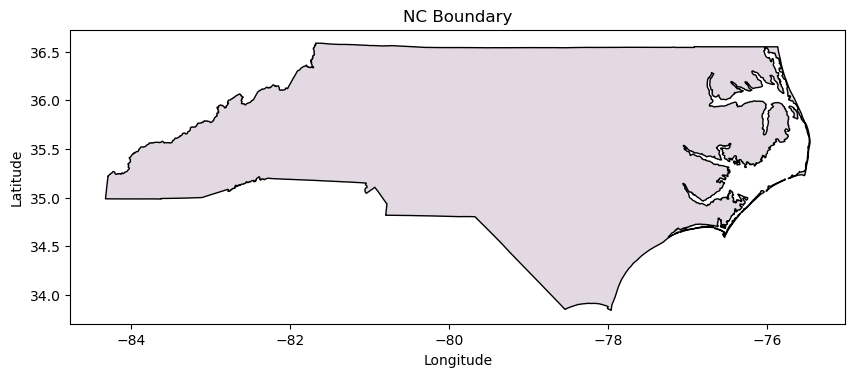

In [13]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(state_df, geometry='geometry')

# Plot using the 'viridis' colormap
gdf.plot(edgecolor="black", cmap='twilight', figsize=(10, 10))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NC Boundary')

plt.show()